In [261]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [262]:
import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler

In [263]:
df = pd.read_csv('CardiacPrediction.csv')
df

,SEQN,Gender,Age,Annual-Family-Income,Ratio-Family-Income-Poverty,X60-sec-pulse,Systolic,Diastolic,Weight,Height,...,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Health-Insurance,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
0,2,1,77,8,5.00,68,98,56,75.4,174.0,...,5.56,1.39,4.7,3,3,1,2,2,2,0
1,5,1,49,11,5.00,66,122,83,92.5,178.3,...,7.21,1.08,5.5,1,1,1,2,2,2,0
2,12,1,37,11,4.93,64,174,99,99.2,180.0,...,4.03,0.98,5.2,2,1,1,2,1,1,0
3,13,1,70,3,1.07,102,130,66,63.6,157.7,...,8.12,1.28,7.6,3,3,1,1,1,2,0
4,14,1,81,5,2.67,72,136,61,75.5,166.2,...,4.50,1.04,5.8,1,1,1,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37074,93691,1,25,10,1.59,92,112,76,39.2,136.5,...,4.14,1.27,5.8,2,2,1,2,1,2,0
37075,93695,2,76,4,1.43,78,112,46,59.1,165.8,...,3.62,1.76,5.6,2,2,1,2,2,2,0
37076,93697,2,80,7,2.97,74,146,58,71.7,152.2,...,6.62,2.90,5.7,2,2,1,2,2,2,0
37077,93700,1,35,1,0.00,76,106,66,78.2,173.3,...,3.72,1.09,5.2,2,2,1,2,2,1,0


## Exploratory Data Analysis

In [264]:
#Removes unimportant variables as shown in Research Paper 2
df.drop(['SEQN','Annual-Family-Income','Height','Ratio-Family-Income-Poverty','X60-sec-pulse',
          'Health-Insurance','Lymphocyte','Monocyte','Eosinophils','Total-Cholesterol','Mean-Cell-Vol','Mean-Cell-Hgb-Conc.','Hematocrit','Segmented-Neutrophils'], axis = 1, inplace=True)

In [293]:
#All Columns in the dataset
df.columns

Index(['Gender', 'Age', 'Systolic', 'Diastolic', 'Weight', 'Body-Mass-Index',
       'White-Blood-Cells', 'Basophils', 'Red-Blood-Cells', 'Hemoglobin',
       'Mean-cell-Hemoglobin', 'Platelet-count', 'Mean-Platelet-Vol',
       'Red-Cell-Distribution-Width', 'Albumin', 'ALP', 'AST', 'ALT',
       'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH',
       'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid', 'Triglycerides',
       'HDL', 'Glycohemoglobin', 'Vigorous-work', 'Moderate-work', 'Diabetes',
       'Blood-Rel-Diabetes', 'Blood-Rel-Stroke', 'CoronaryHeartDisease'],
      dtype='object')

In [289]:
#importing packages for vizualizations
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'drive', 'CardiacPrediction.csv', 'sample_data']


In [291]:
print(df.corr()["CoronaryHeartDisease"].sort_values(ascending=False))

CoronaryHeartDisease           1.000000
Age                            0.222649
Creatinine                     0.114318
Glycohemoglobin                0.101517
Uric.Acid                      0.098907
Glucose                        0.086754
Systolic                       0.080224
Red-Cell-Distribution-Width    0.074316
LDH                            0.072073
Vigorous-work                  0.054506
Triglycerides                  0.034160
Bilirubin                      0.030407
Weight                         0.029003
ALP                            0.028672
Moderate-work                  0.022683
Body-Mass-Index                0.022211
GGT                            0.014732
White-Blood-Cells              0.011565
Mean-Platelet-Vol              0.008768
AST                            0.008149
Basophils                     -0.000105
ALT                           -0.004512
Mean-cell-Hemoglobin          -0.014665
Hemoglobin                    -0.015201
Iron                          -0.018252


CoronaryHeartDisease           1.000000
Age                            0.222649
Creatinine                     0.114318
Glycohemoglobin                0.101517
Uric.Acid                      0.098907
Glucose                        0.086754
Systolic                       0.080224
Red-Cell-Distribution-Width    0.074316
LDH                            0.072073
Vigorous-work                  0.054506
Triglycerides                  0.034160
Bilirubin                      0.030407
Weight                         0.029003
ALP                            0.028672
Moderate-work                  0.022683
Body-Mass-Index                0.022211
GGT                            0.014732
White-Blood-Cells              0.011565
Mean-Platelet-Vol              0.008768
AST                            0.008149
Basophils                     -0.000105
ALT                           -0.004512
Mean-cell-Hemoglobin          -0.014665
Hemoglobin                    -0.015201
Iron                          -0.018252


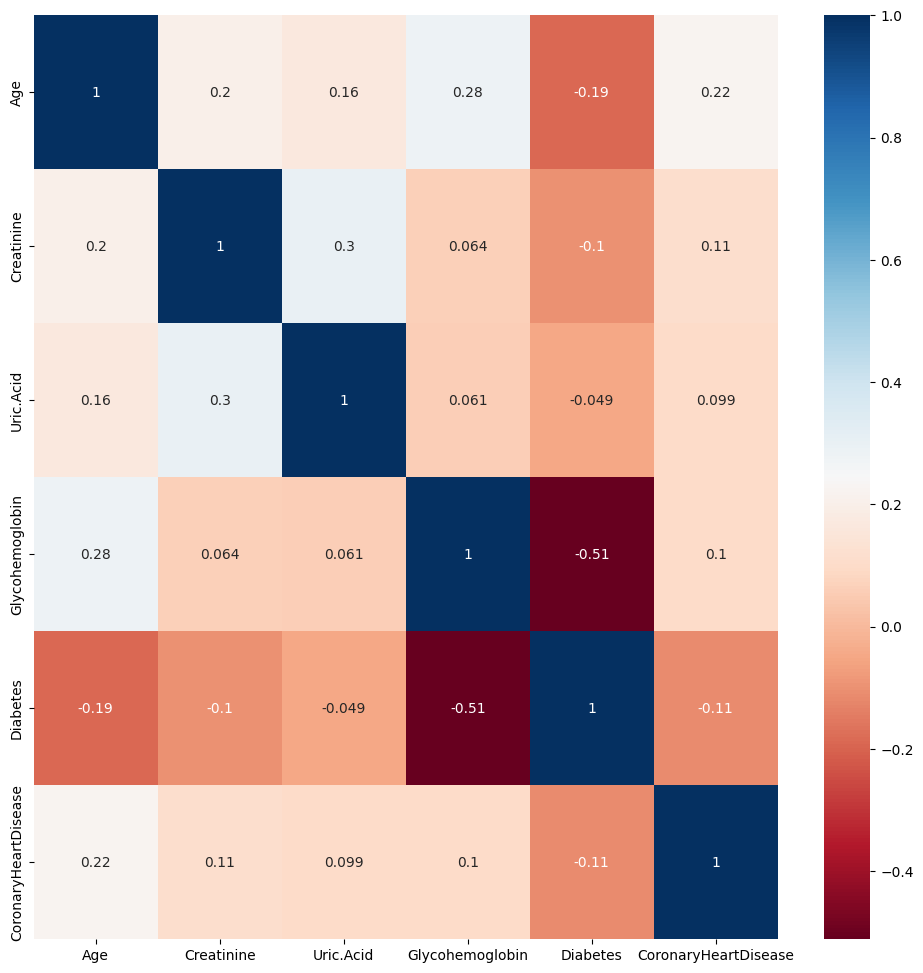

In [290]:
#find correlation matrix
corr_mat=df.corr()
#Select variables have more than 0.09 or less than -0.09 correlation with the target variable(CoronaryHeartDisease)
chosen_variable=corr_mat[abs(corr_mat["CoronaryHeartDisease"])>0.09].index
#plot the heatmap
plt.figure(figsize=(12,12))
ax = sns.heatmap(df[chosen_variable].corr(),annot=True,cmap='RdBu')

In [296]:
heartDiseaseCount = (df['CoronaryHeartDisease'] == 1).sum()
noHeartDiseaseCount = (df['CoronaryHeartDisease'] == 0).sum()
print(f'People with heart disease: {heartDiseaseCount} \nPeople without heart disease: {noHeartDiseaseCount}')

People with heart disease: 1508 
People without heart disease: 35571


0    35571
1     1508
Name: CoronaryHeartDisease, dtype: int64


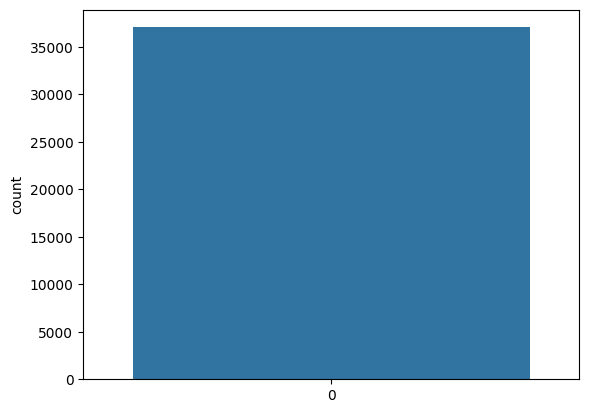

In [299]:
#Analysing the target variable
y = df["CoronaryHeartDisease"]

sns.countplot(y)

target_temp = df.CoronaryHeartDisease.value_counts()

print(target_temp)

<Axes: xlabel='Gender', ylabel='CoronaryHeartDisease'>

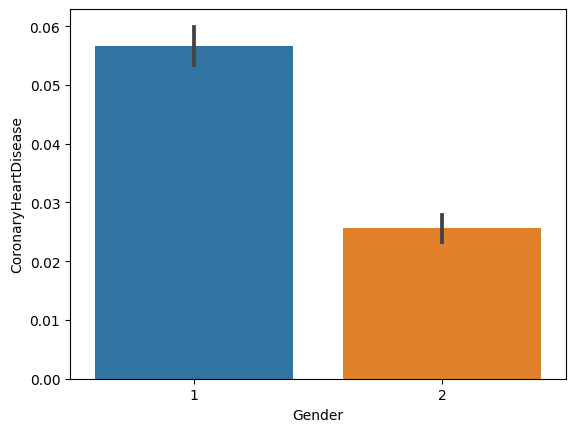

In [303]:
# analyzing gender in the dataset
df["Gender"].unique()

# 1 = Male
# 2 = Female
sns.barplot(x=df["Gender"], y=y)

<Axes: xlabel='Age', ylabel='count'>

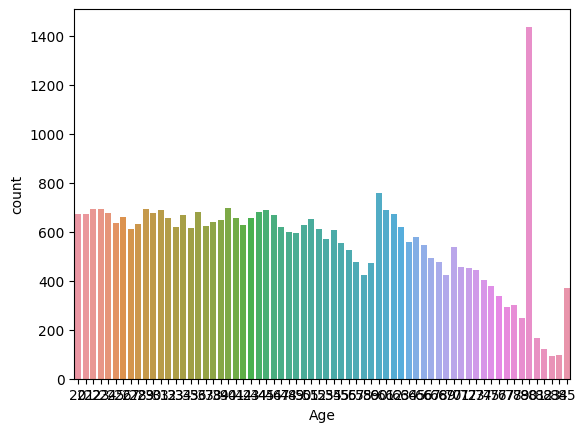

In [304]:
# Analyzing the age feature
df["Age"].unique()

# how many there are in the dataset
sns.countplot(x=df["Age"])

<Axes: xlabel='Age', ylabel='CoronaryHeartDisease'>

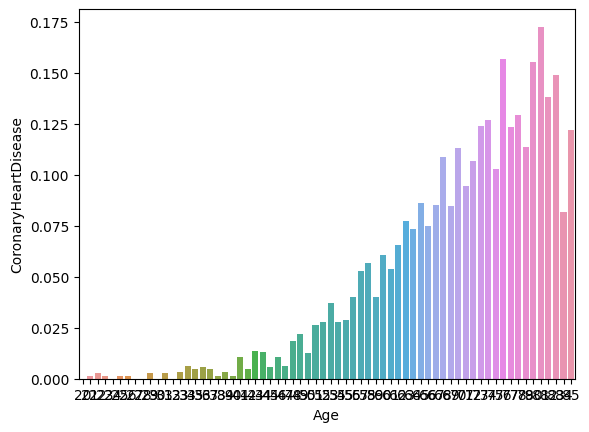

In [305]:
# the percentage who have heart disease
sns.barplot(x=df["Age"],y=y, errorbar=None)

<Axes: xlabel='Diabetes', ylabel='CoronaryHeartDisease'>

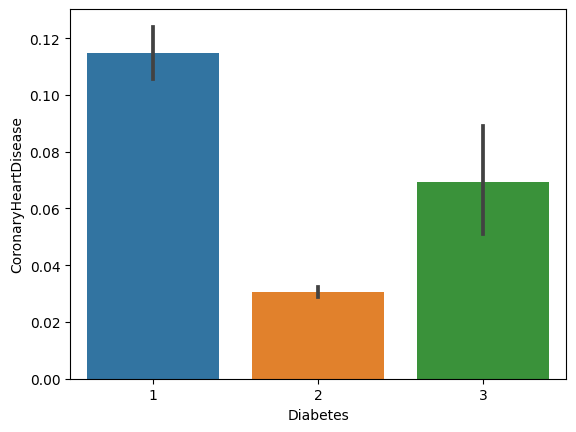

In [306]:
# The margin of error for some of the older ages is larger because of the small sample size, but the error bars hurt the understandability of the graph so I had to remove them.
# analyzing the diabetes feature
df["Diabetes"].unique()

sns.barplot(x=df["Diabetes"],y=y)

<Axes: xlabel='Creatinine', ylabel='Density'>

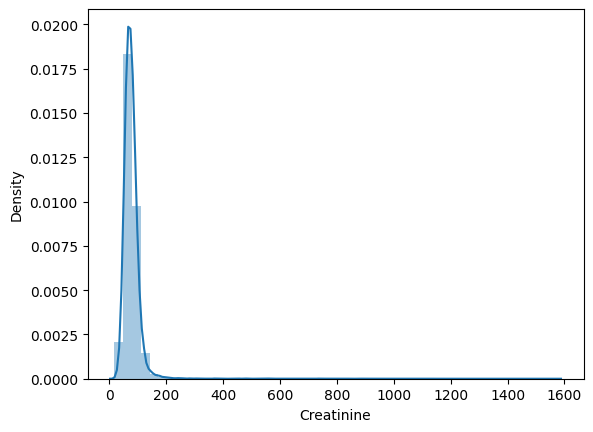

In [307]:
# explorting the density of the creatinine feature
sns.distplot(df['Creatinine'])

<Axes: xlabel='Glycohemoglobin', ylabel='Density'>

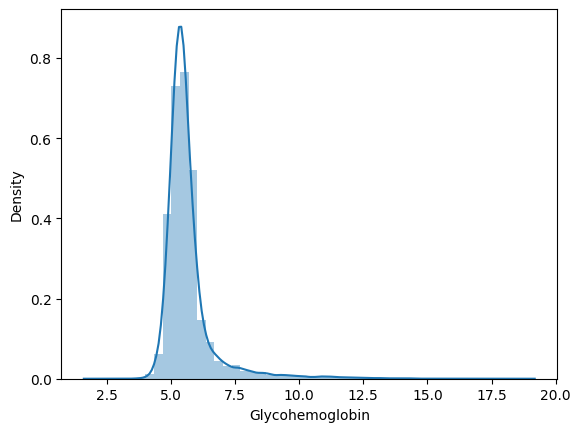

In [308]:
#exploring the density of the Glycohemoglobin feature
sns.distplot(df['Glycohemoglobin'])

<Axes: xlabel='Cholesterol', ylabel='Density'>

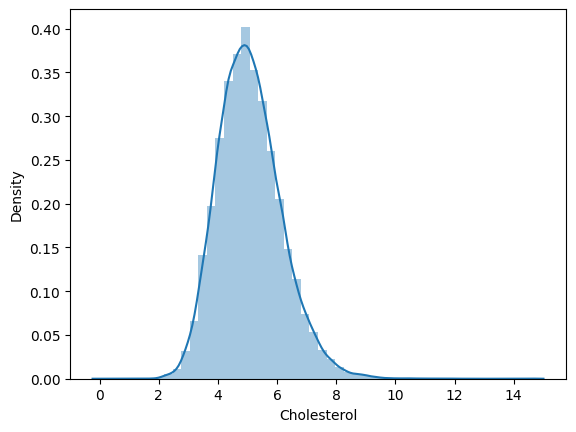

In [309]:
# exploring the density of the cholesterol feature
sns.distplot(df['Cholesterol'])

<Axes: xlabel='Cholesterol', ylabel='CoronaryHeartDisease'>

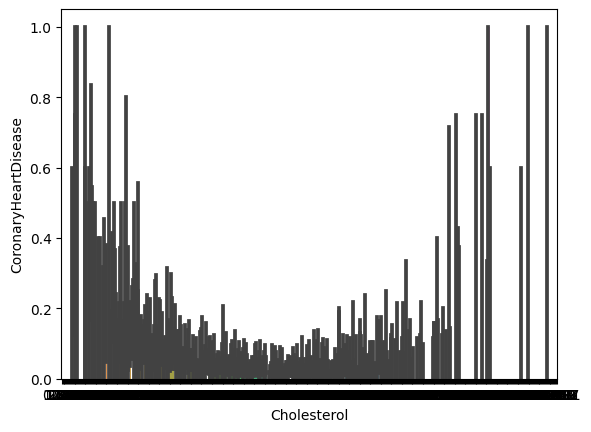

In [310]:
sns.barplot(x=df["Cholesterol"],y=y)

## Balancing the Imbalanced Data

In [267]:
X = df.drop('CoronaryHeartDisease', axis=1)
y = df['CoronaryHeartDisease']

# undersampling the data
rus = RandomUnderSampler()

X_resampled, y_resampled = rus.fit_resample(X, y)


## LASSO for Feature Selection

In [268]:
# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

print("Training set shapes:", X_train.shape, y_train.shape)
print("Testing set shapes:", X_test.shape, y_test.shape)

Training set shapes: (2412, 36) (2412,)
Testing set shapes: (604, 36) (604,)


In [269]:
#Feature Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [270]:
# create the lasso model
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5)

lasso_cv.fit(X_train, y_train)

print('The optimal alpha is', lasso_cv.alpha_)

# finding the predicted probability
y_pred_proba = lasso_cv.predict(X_test)
# converting to binary predictions
y_pred = (y_pred_proba > 0.5).astype(int)   # might need to lower threshold
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

The optimal alpha is 0.01
Accuracy: 0.7996688741721855


In [271]:
#Feature selection in Lasso
lassoCoef = pd.Series(lasso_cv.coef_, index=X.columns)
selectedFeatures = lassoCoef[lassoCoef != 0]
print(f'The selected features are \n{selectedFeatures}')

The selected features are 
Gender                        -0.037942
Age                            0.228546
Diastolic                     -0.006678
Weight                         0.000594
White-Blood-Cells              0.005012
Platelet-count                -0.014880
Red-Cell-Distribution-Width    0.018598
ALT                           -0.002173
Cholesterol                   -0.058709
Creatinine                     0.012078
GGT                            0.000752
LDH                            0.009212
Uric.Acid                      0.020984
Triglycerides                  0.021743
HDL                           -0.019186
Glycohemoglobin                0.016533
Diabetes                      -0.026743
Blood-Rel-Diabetes            -0.000255
Blood-Rel-Stroke              -0.047134
dtype: float64


## Machine Learning Experiments

In [272]:
df_reduced = df[[
    "CoronaryHeartDisease", "Gender", "Age", "Diastolic", "Red-Blood-Cells",
    "Platelet-count", "Mean-Platelet-Vol", "Red-Cell-Distribution-Width", "ALP",
    "Cholesterol", "Creatinine", "Iron", "LDH", "Uric.Acid", "Triglycerides",
    "HDL", "Glycohemoglobin", "Vigorous-work", "Diabetes", "Blood-Rel-Diabetes",
    "Blood-Rel-Stroke"
                 ]]
df_reduced

,CoronaryHeartDisease,Gender,Age,Diastolic,Red-Blood-Cells,Platelet-count,Mean-Platelet-Vol,Red-Cell-Distribution-Width,ALP,Cholesterol,...,Iron,LDH,Uric.Acid,Triglycerides,HDL,Glycohemoglobin,Vigorous-work,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke
0,0,1,77,56,4.73,214.0,7.7,13.7,62,5.250,...,11.28,140,362.8,1.298,1.39,4.7,3,2,2,2
1,0,1,49,83,5.13,209.0,10.4,13.1,63,7.160,...,24.54,133,404.5,3.850,1.08,5.5,1,2,2,2
2,0,1,37,99,5.76,357.0,7.9,13.6,63,3.900,...,11.28,131,339.0,1.581,0.98,5.2,2,2,1,1
3,0,1,70,66,5.53,228.0,8.8,14.4,103,7.940,...,12.18,181,410.4,3.635,1.28,7.6,3,1,1,2
4,0,1,81,61,5.32,160.0,9.0,12.4,110,4.420,...,11.82,150,368.8,0.756,1.04,5.8,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37074,0,1,25,76,5.50,253.0,7.5,13.3,67,4.189,...,13.10,144,428.3,1.264,1.27,5.8,2,2,1,2
37075,0,2,76,46,4.70,135.0,9.5,13.6,50,3.646,...,15.00,124,368.8,0.948,1.76,5.6,2,2,2,2
37076,0,2,80,58,4.44,172.0,8.1,16.9,54,6.801,...,8.40,120,273.6,1.095,2.90,5.7,2,2,2,2
37077,0,1,35,66,5.01,194.0,9.6,13.0,140,3.672,...,9.00,136,237.9,0.937,1.09,5.2,2,2,2,1


In [273]:
X = df.drop('CoronaryHeartDisease', axis=1)
y = df['CoronaryHeartDisease']

# undersampling the data
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

print("Training set shapes:", X_train.shape, y_train.shape)
print("Testing set shapes:", X_test.shape, y_test.shape)

Training set shapes: (2412, 36) (2412,)
Testing set shapes: (604, 36) (604,)


In [274]:
#Feature Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [275]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

### Logistic Regression

In [276]:
# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lr = LogisticRegression(C=10)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7947019867549668
Precision: 0.78125
Recall: 0.8223684210526315
F1-Score: 0.8012820512820513


In [277]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### Naive Bayes

In [278]:
nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7036423841059603
Precision: 0.8272251308900523
Recall: 0.5197368421052632
F1-Score: 0.6383838383838384


In [279]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### SVM

In [280]:
# param_grid = {'kernel': ('linear', 'rbf','poly') ,
#               'C':[5, 10, 100],
#               'gamma': [1,0.1,0.01,0.001],
#               'degree' : [1,2,3,4,5,6]}

sv = SVC(C=5, degree=1, gamma=0.001, kernel='poly')

sv.fit(X_train, y_train)

y_pred = sv.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7980132450331126
Precision: 0.7740963855421686
Recall: 0.8453947368421053
F1-Score: 0.8081761006289309


In [281]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### K-Nearest Neighbors

In [282]:
# k = list(range(1, 25))
# param_grid = {'n_neighbors': k}

knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7731788079470199
Precision: 0.8014440433212996
Recall: 0.7302631578947368
F1-Score: 0.7641996557659209


In [283]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### Random Forest

In [284]:
# param_grid = {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
#               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
#               'max_features': ['sqrt', 'log2']}

rf = RandomForestClassifier(n_estimators=1800, max_depth=20)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7947019867549668
Precision: 0.7631578947368421
Recall: 0.8585526315789473
F1-Score: 0.8080495356037152


In [285]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### XGBoost

In [286]:
xgb_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=250, max_depth=9)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7831125827814569
Precision: 0.7613293051359517
Recall: 0.8289473684210527
F1-Score: 0.7937007874015749


In [287]:
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)

### Model Metric Comparison

In [288]:
# create a table/chart with the metrics of all the models and figure out which performs the best
data = [accuracy_list, precision_list, recall_list, f1_list]

df_metrics = pd.DataFrame(data=data, columns=['Logistic Regression', 'Naive Bayes', 'SVM', 'K-Nearest Neighbors', 'Random Forest', 'XGBoost'],
                          index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_metrics

,Logistic Regression,Naive Bayes,SVM,K-Nearest Neighbors,Random Forest,XGBoost
Accuracy,0.794702,0.703642,0.798013,0.773179,0.794702,0.783113
Precision,0.781250,0.827225,0.774096,0.801444,0.763158,0.761329
Recall,0.822368,0.519737,0.845395,0.730263,0.858553,0.828947
F1-Score,0.801282,0.638384,0.808176,0.764200,0.808050,0.793701
